In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [129]:
plt.rc("axes", linewidth=1.5)
plt.rc("font", family="serif", size=12)
plt.rc("savefig", dpi="150")

In [130]:
print(open("exp/sod/rpe/loss.csv").readline())

step,train_loss,valid_loss,type_loss,beat_loss,position_loss,pitch_loss,duration_loss,instrument_loss



In [131]:
loss_ape = np.loadtxt("exp/sod/ape/loss.csv", skiprows=1, delimiter=",")
loss_rpe = np.loadtxt("exp/sod/rpe/loss.csv", skiprows=1, delimiter=",")
loss_npe = np.loadtxt("exp/sod/npe/loss.csv", skiprows=1, delimiter=",")
loss_lmd_ape = np.loadtxt("exp/lmd/ape/loss.csv", skiprows=1, delimiter=",")
loss_lmd_rpe = np.loadtxt("exp/lmd/rpe/loss.csv", skiprows=1, delimiter=",")
loss_lmd_npe = np.loadtxt("exp/lmd/npe/loss.csv", skiprows=1, delimiter=",")

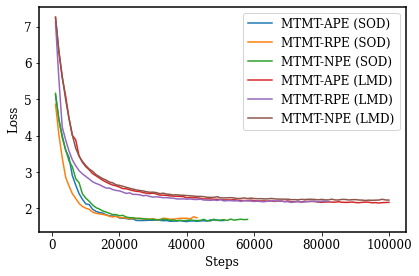

In [132]:
plt.figure(figsize=(6, 3))
plt.plot(loss_ape[:, 0], loss_ape[:, 2], color="C0", label=f"MTMT-APE (SOD), min={loss_ape[:, 2].min():.4}")
plt.plot(loss_rpe[:, 0], loss_rpe[:, 2], color="C1", label=f"MTMT-RPE (SOD), min={loss_rpe[:, 2].min():.4}")
plt.plot(loss_npe[:, 0], loss_npe[:, 2], color="C2", label=f"MTMT-NPE (SOD), min={loss_npe[:, 2].min():.4}")
plt.plot(loss_lmd_ape[:, 0], loss_lmd_ape[:, 2], color="C3", label=f"MTMT-APE (LMD), min={loss_lmd_ape[:, 2].min():.4}")
plt.plot(loss_lmd_rpe[:, 0], loss_lmd_rpe[:, 2], color="C4", label=f"MTMT-RPE (LMD), min={loss_lmd_rpe[:, 2].min():.4}")
plt.plot(loss_lmd_npe[:, 0], loss_lmd_npe[:, 2], color="C5", label=f"MTMT-NPE (LMD), min={loss_lmd_npe[:, 2].min():.4}")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("loss.pdf", bbox_inches="tight")
# plt.savefig("loss.png", bbox_inches="tight")
plt.show()

In [133]:
idx_ape = np.argmin(loss_ape[:, 2])
idx_rpe = np.argmin(loss_rpe[:, 2])
idx_npe = np.argmin(loss_npe[:, 2])
idx_lmd_ape = np.argmin(loss_lmd_ape[:, 2])
idx_lmd_rpe = np.argmin(loss_lmd_rpe[:, 2])
idx_lmd_npe = np.argmin(loss_lmd_npe[:, 2])

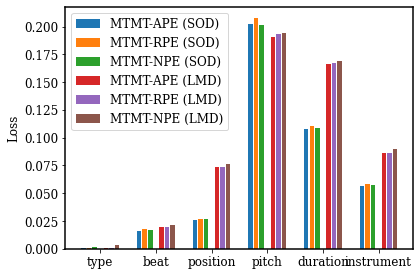

In [134]:
plt.figure(figsize=(6, 4))
s = .1
w = .08
plt.bar(np.arange(6) - .1 - s * 2, loss_ape[idx_ape, 3:], w, label="MTMT-APE (SOD)")
plt.bar(np.arange(6) - .1 - s, loss_rpe[idx_rpe, 3:], w, label="MTMT-RPE (SOD)")
plt.bar(np.arange(6) - .1, loss_npe[idx_npe, 3:], w, label="MTMT-NPE (SOD)")
plt.bar(np.arange(6) + .1, loss_lmd_ape[idx_lmd_ape, 3:], w, label="MTMT-APE (LMD)")
plt.bar(np.arange(6) + .1 + s, loss_lmd_rpe[idx_lmd_rpe, 3:], w, label="MTMT-RPE (LMD)")
plt.bar(np.arange(6) + .1 + s * 2, loss_lmd_npe[idx_lmd_npe, 3:], w, label="MTMT-NPE (LMD)")
plt.xticks(np.arange(6), ["type", "beat", "position", "pitch", "duration", "instrument"])
plt.legend()
plt.ylabel("Loss")
plt.tight_layout()
plt.savefig("losses.pdf", bbox_inches="tight")
# plt.savefig("losses.png", bbox_inches="tight")
plt.show()

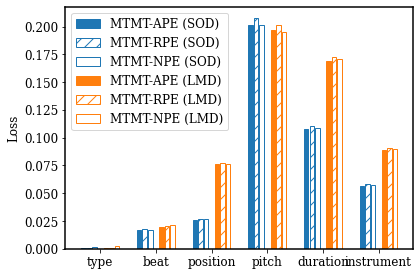

In [95]:
plt.figure(figsize=(6, 4))
plt.bar(np.arange(6) - .3, loss_ape[idx_ape, 3:], .08, facecolor="C0", edgecolor="C0", label="MTMT-APE (SOD)")
plt.bar(np.arange(6) - .2, loss_rpe[idx_rpe, 3:], .08, facecolor="w", edgecolor="C0", hatch="//", label="MTMT-RPE (SOD)")
plt.bar(np.arange(6) - .1, loss_npe[idx_npe, 3:], .08, facecolor="w", edgecolor="C0", label="MTMT-NPE (SOD)")
plt.bar(np.arange(6) + .1, loss_lmd_ape[idx_lmd_ape, 3:], .08, facecolor="C1", edgecolor="C1", label="MTMT-APE (LMD)")
plt.bar(np.arange(6) + .2, loss_lmd_rpe[idx_lmd_rpe, 3:], .08, facecolor="w", edgecolor="C1", hatch="//", label="MTMT-RPE (LMD)")
plt.bar(np.arange(6) + .3, loss_lmd_npe[idx_lmd_npe, 3:], .08, facecolor="w", edgecolor="C1", label="MTMT-NPE (LMD)")
plt.xticks(np.arange(6), ["type", "beat", "position", "pitch", "duration", "instrument"])
plt.legend()
plt.ylabel("Loss")
plt.tight_layout()
# plt.savefig("losses.pdf", bbox_inches="tight")
# plt.savefig("losses.png", bbox_inches="tight")
plt.show()

In [127]:
print(loss_ape[:, 2].min())
print(loss_rpe[:, 2].min())
print(loss_npe[:, 2].min())
print(loss_lmd_ape[:, 2].min())
print(loss_lmd_rpe[:, 2].min())
print(loss_lmd_npe[:, 2].min())

1.6361185212930043
1.6847053865591686
1.652935728430748
2.1472710642352033
2.1641043477983617
2.2255056264685162


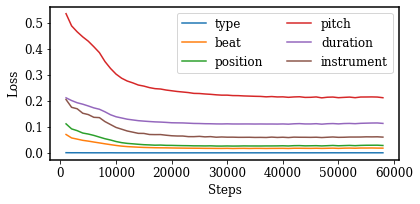

In [104]:
plt.figure(figsize=(6, 3))
plt.plot(losses[:, 0], losses[:, 3], label="type")
plt.plot(losses[:, 0], losses[:, 4], label="beat")
plt.plot(losses[:, 0], losses[:, 5], label="position")
plt.plot(losses[:, 0], losses[:, 6], label="pitch")
plt.plot(losses[:, 0], losses[:, 7], label="duration")
plt.plot(losses[:, 0], losses[:, 8], label="instrument")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("losses.pdf")
plt.savefig("losses.png")
plt.show()

In [105]:
losses_lmd = np.loadtxt("exp/lmd/ape/loss.csv", skiprows=1, delimiter=",")
losses_lmd[:, 3:] /= 1072

In [106]:
idx_lmd = np.argmin(losses_lmd[:, 2])
print(losses_lmd[idx_lmd, 3:])

[0.00060987 0.01993479 0.07695055 0.20094454 0.17171376 0.0908893 ]


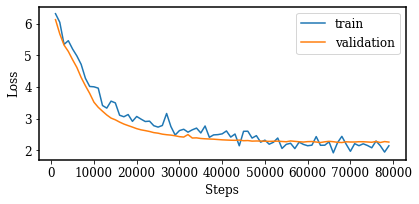

In [107]:
plt.figure(figsize=(6, 3))
plt.plot(losses_lmd[:, 0], losses_lmd[:, 1], label="train")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 2], label="validation")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("loss-lmd.pdf")
plt.savefig("loss-lmd.png")
plt.show()

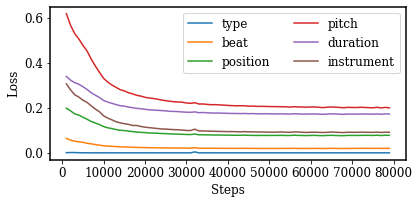

In [108]:
plt.figure(figsize=(6, 3))
plt.plot(losses_lmd[:, 0], losses_lmd[:, 3], label="type")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 4], label="beat")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 5], label="position")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 6], label="pitch")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 7], label="duration")
plt.plot(losses_lmd[:, 0], losses_lmd[:, 8], label="instrument")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("losses-lmd.pdf")
plt.savefig("losses-lmd.png")
plt.show()

In [6]:
import muspy
import pathlib

In [11]:
n_pieces_sod = sum(1 for filename in pathlib.Path("data/sod/processed/json").rglob("*.json"))
print(f"Number of pieces in SOD dataset: {n_pieces_sod}")

Number of pieces in SOD dataset: 5743


In [8]:
total_length_sod = sum(muspy.load(filename).get_real_end_time() for filename in pathlib.Path("data/sod/processed/json").rglob("*.json"))
print(f"Total length of SOD dataset: {total_length_sod / 3600:.4f} hr")

Total length of SOD dataset: 356.7167 hr


In [12]:
n_pieces_lmd = sum(1 for filename in pathlib.Path("data/lmd/processed/json").rglob("*.json"))
print(f"Number of pieces in LMD dataset: {n_pieces_lmd}")

Number of pieces in LMD dataset: 13206


In [9]:
total_length_lmd = sum(muspy.load(filename).get_real_end_time() for filename in pathlib.Path("data/lmd/processed/json").rglob("*.json"))
print(f"Total length of LMD dataset: {total_length_lmd / 3600:.4f} hr")

Total length of LMD dataset: 818.6993 hr


In [34]:
n_pieces_lmd_full = sum(1 for filename in pathlib.Path("data/lmd_full/processed/json").rglob("*.json"))
print(f"Number of pieces in LMD-full dataset: {n_pieces_lmd_full}")

Number of pieces in LMD-full dataset: 166138


In [37]:
job = lambda filename: muspy.load(filename).get_real_end_time()
total_length_lmd_full = sum(joblib.Parallel(n_jobs=10)(joblib.delayed(job)(filename) for filename in pathlib.Path("data/lmd_full/processed/json").rglob("*.json")))
print(f"Total length of LMD-full dataset: {total_length_lmd_full / 3600:.4f} hr")

Total length of LMD-full dataset: 9298.0136 hr
